## Project: Data Wrangling using Pandas and Regex

In this project you are asked __to implement__ and __perform a unit testing__ for a series of Python functions (Q1-Q13) that are typically required during the ***data wrangling*** phase of the end-to-end data science pipeline. A subset of unit testing functions is provided for you. You are expected to write unit testing for all the remaining functions.

__Data Wrangling consists of the following main steps:__

* Data Acquisition
* Data Cleansing
* Data Understanding: Basics
* Data Manipulation
  
  
__1. Data Acquisition Objectives__

* Question 1: How to import multiples files for storage and access? (store filenames in array)
* Question 2: How to import data in different formats? (read_excel, read_csv)
* Question 2: How are they read into by pandas? (DataFrame)
* Question 4: How to have a peek at the data after import? (head/tail)

__2. Data Cleansing Objectives__

* Question 5: Check attributes of each file
* Question 5: Identify data types
* Question 5: Apply coercion if applicable
* Question 5: Check for NA/missing data
* Question 6: Remove/replace corrupt data
* Question 6: Identify duplicate data
* Question 6: Check for corrupt/incorrect data  

* Check for data consistency (e.g. GPA cannot be less than 0)
* Identifying and removing outliers

__3. Data Understanding Objectives__

* Question 7: Basic Summary Statistics
* Question 9: Dimensionality

__4. Data Manipulation Objectives__

* Question 11: Merge/Concatenate DataFrame
* Question 11: Mapping to create a new attribute
* Question 11: Incorporate the use of multiple functions
* Question 12: Filter to subset the data
* Question 13: Discretize data 
  
  
__Regular Expressions:__ *Regular expressions are used in conjunction with other preprocessing steps for matching/parsing patterns.*

* Questions 2/5/6: Filter to subset the dataUse regular expressions to find/match specific content
* Question 6: Filter to subset the dataString manipulation via. substring and replace methods

## Install Required Packages

If you do not have Anaconda installed, then you may need to install the following packages using the following commands (Note: If you have Anaconda installed, then you already have Pandas and `regex`):

> pip3 install pandas  
  
> pip3 install regex

## INSTRUCTIONS: In all the functions, remove the `pass` statement and write your code.

In [253]:
import numpy as np
import pandas as pd
import re
import glob
import copy
import os

%matplotlib inline
import matplotlib.pyplot as plt

os.chdir('C:/Users/Utkarsh/Downloads/Project Data Wrangling Resources description, data, code template-20190112')

### __Question 1: Write a function to import all excel file names into a list.__

_Hint: Use the glob module._

In [254]:
def Q1_function():
    """
    :type : None
    :rtype: List[String]
    """
    # TYPE YOUR CODE HERE
    
    path = 'data_raw/data_raw'
    fileNames = glob.glob(path + '/*.xlsx')
#     fileNames = [os.path.basename(x) for x in glob.glob(path + '/*.xlsx')]    
    return fileNames
    
# Call the function and print the result. This result is used in subsequent questions.
filenames = Q1_function()
print(filenames)

['data_raw/data_raw\\Python-QUIZ Coercion (6 min.)-grades.xlsx', 'data_raw/data_raw\\Python-QUIZ Conditionals (6 min.)-grades.xlsx', 'data_raw/data_raw\\Python-QUIZ Dictionaries (10 min.)-grades.xlsx', 'data_raw/data_raw\\Python-QUIZ Exceptions (10 min.)-grades.xlsx', 'data_raw/data_raw\\Python-QUIZ Functions (18 min.)-grades.xlsx', 'data_raw/data_raw\\Python-QUIZ Iterations (6 min.)-grades.xlsx', 'data_raw/data_raw\\Python-QUIZ Lists (10 min.)-grades.xlsx', 'data_raw/data_raw\\Python-QUIZ Sets (7 min)-grades.xlsx', 'data_raw/data_raw\\Python-QUIZ Strings (5 min.)-grades.xlsx', 'data_raw/data_raw\\Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', 'data_raw/data_raw\\Python-QUIZ Tuples (10 min.)-grades.xlsx']


### __Question 2: Write a function to return the name of the excel file based on a given string. *(The string is defined for you)*__  
*Hints: Use the following.*
* Regex 're.search' function.
* Pandas function 'read_excel'

In [255]:
def Q2_function(files, s):
    """
    :type : List[String], String
    :rtype: String
    """
    # TYPE YOUR CODE HERE
    
    fileNames = []
    
    for item in files:
        obj = re.search('.' + s + '.' , item)
        if obj != None:
            fileNames.append(item)
    
    return fileNames[0]
        

# Call the function and print the result. Use this to check the correctness of your code and for debugging.
file = Q2_function(filenames, s = "Dictionaries")
print(file)

data_raw/data_raw\Python-QUIZ Dictionaries (10 min.)-grades.xlsx


### __Question 3: Write a function to load the "Functions" excel file into a Pandas DataFrame.__  
*Hint: Remember you have executed functions in Questions 1 and 2. Try using them here. You can save some coding time!*  
* Use the result from Question 1.
* Use the function written in Question 2.
* Use the Pandas function 'read_excel' to import an excel file.

In [256]:
def Q3_function(files, s):
    """
    :type : List[String], String
    :rtype: Pandas DataFrame
    """
    # TYPE YOUR CODE HERE
    
    file = Q2_function(files, s)
    
    return pd.read_excel(file)
    
# Call the function and print the result. This result is used in subsequent questions.
functions_df = Q3_function(filenames, s = "Functions")
print(functions_df)
# functions_df.head(3)

       State                  Started on                   Completed  \
0   Finished    February 5 2018  3:19 PM    February 5 2018  3:34 PM   
1   Finished    February 4 2018  4:01 PM    February 4 2018  4:19 PM   
12  Finished    February 6 2018  3:57 PM    February 6 2018  4:12 PM   
2   Finished   February 10 2018  4:05 PM   February 10 2018  4:23 PM   
3   Finished    February 4 2018  4:59 PM    February 4 2018  5:16 PM   
4   Finished    February 5 2018  5:20 PM    February 5 2018  5:38 PM   
5   Finished   February 10 2018  9:49 PM  February 10 2018  10:07 PM   
6   Finished    February 5 2018  8:30 PM    February 5 2018  8:48 PM   
7   Finished   February 13 2018  4:17 AM   February 13 2018  4:35 AM   
8   Finished   February 12 2018  2:19 PM   February 12 2018  2:35 PM   
9   Finished  February 13 2018  10:45 AM  February 13 2018  11:03 AM   
10  Finished   February 11 2018  1:48 AM   February 11 2018  2:06 AM   
4   Finished    February 5 2018  5:20 PM    February 5 2018  5:3

### __Question 4: Using the output obtained in Question 3 as input for the current question, write a function to do the following.__  
* Find all the names of the columns and return as a list.
* Find the subset of the DataFrame (use `df.loc`) and return the new DataFrame. Include the following columns:   
_"id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"_
* Return the top 10 rows (use `df.head function`).

Learn about returning multiple values in Python.

In [257]:
def Q4_function(dataframe):
    """
    :type : DataFrame
    :rtype: [String], DataFrame, DataFrame
    """
    # TYPE YOUR CODE HERE
    columnNames = list(dataframe.columns.values)
    subsettedDataFrame = dataframe.loc[:,['id','Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00']]
    return columnNames , subsettedDataFrame , dataframe.head(10)

# Call the function and print the results. These results are used in subsequent questions.
names, df_subset, top_10 = Q4_function(functions_df)

print("Column Names")
print(names)
print()

print("Subsetted Data")
print(df_subset)
print()
print("Top 10 Rows")
print(top_10)

Column Names
['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00', 'id']

Subsetted Data
    id       Time taken  Grade/45.00  Q. 1 /5.00  Q. 2 /10.00  Q. 3 /6.00  \
0    0  14 mins 16 secs           32           5            6           6   
1    1  17 mins 54 secs           31           5            8           6   
12  12  15 mins 44 secs           20           3            4           3   
2    2          18 mins           30           5            6           6   
3    3  17 mins 31 secs           26           5            6           6   
4    4  17 mins 59 secs           25           5            6           6   
5    5          18 mins           24           5            6           6   
6    6          18 mins           23           5            6           0   
7    7    18 mins 1 sec           23           4            4           6   
8    8  16 mins 44 secs           22       

### Question 5: Using the subsetted DataFrame from the previous question, complete the following tasks.

* Identify the data type of every column. Return as a list. *(read about dtypes)*
* Strip all white spaces from the columns. 
    + try using list comprehension along with the 'sub' function in 're' module
* Check if 'Time taken' column has NA or empty values:
    + use `df.isnull().any()`. 
    + If YES, replace with 0: use `df.fillna()`.
* Using `regex` (`re.search`), convert the 'Time taken' column into seconds (int) and store in a new column called 'time' (e.g., convert __2 mins 10 secs__ into __130__. Note that to get 130, you need to do some math. Use coersion to convert str to int.
* Return the DataFrame with 'Time taken' column dropped.

In [258]:
def getSeconds(time):
    if time == 0:
        return 0
    else:
        tokens = time.split()
        tokens.reverse()
        mult = 1
        ctr = 1
        ans = 0

        for token in tokens:
            if ctr%2 == 1:
                if token == 'secs' or token == 'sec':
                    mult = 1
                if token == 'mins' or token == 'min':
                    mult = 60
            if ctr%2 == 0:
                ans += int(token)*mult
            ctr += 1

        return ans

def Q5_function(df):
    
    """
    :type : DataFrame
    :rtype: [String], DataFrame
    """
    # TYPE YOUR CODE HERE
    dataTypes = df.dtypes
    df.columns = df.columns.str.replace(' ', '')
    #fillna krna hai abhi
    if(df['Timetaken'].isnull().any()):
        df['Timetaken'].fillna(value=0 , inplace=True)
    
    df['time'] = 0 #New column added
    for index, row in df.iterrows():
        time = row['Timetaken']
        df.at[index, 'time'] = getSeconds(time)
    
    df = df.drop('Timetaken', axis=1)
    return dataTypes , df



# Call the function and print the results. These results are used in subsequent questions.
column_types, Q5_df = Q5_function(df_subset)
print("Column Datatypes")
print(column_types)
print()
print("New Update DataFrame")
print(Q5_df)

Column Datatypes
id              int64
Time taken     object
Grade/45.00     int64
Q. 1 /5.00      int64
Q. 2 /10.00     int64
Q. 3 /6.00      int64
Q. 4 /6.00     object
Q. 5 /12.00    object
Q. 6 /6.00     object
dtype: object

New Update DataFrame
    id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00 Q.4/6.00 Q.5/12.00  \
0    0           32         5          6         6     3.00     12.00   
1    1           31         5          8         6        -     12.00   
12  12           20         3          4         3        -     10.00   
2    2           30         5          6         6     3.00     10.00   
3    3           26         5          6         6     3.00      6.00   
4    4           25         5          6         6     6.00      2.00   
5    5           24         5          6         6     3.00      4.00   
6    6           23         5          6         0     0.00      6.00   
7    7           23         4          4         6     3.00      6.00   
8    8           22

### Question 6: Using the returned DataFrame from the previous question, complete the following tasks.

* Some columns might need to be converted to integer for the subsequent tasks. Identify which columns and convert them to int/float.
* Are there any duplicate rows? Remove them from the DataFrame.
* Data collected might be corrupt. Check whether data is missing or corrupt. Data is missing if there is a '-'. If missing data exists, replace with the mean of other values.
* With the above point in mind, find the mean values of all columns except 'id'. Append these as a row to your dataframe and return

*Hint: Note that the maximum marks for each column is different. Make sure you parse the information from the column name.*

In [259]:
def Q6_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """
    # TYPE YOUR CODE HERE
    
    df = df.apply(pd.to_numeric,errors='coerce')
    
    columnNames = list(df.columns.values)
    
    newId = df['id'].max() + 1
    
    df.drop_duplicates(keep='first', inplace=True)

    
    for column in columnNames:
        if column != 'id':
            df[column].fillna(value = df[column].mean() , inplace = True)
    
    
    df.loc[newId] = df.mean()
    df.at[newId, 'id'] = newId
    df[["id"]] = df[["id"]].apply(pd.to_numeric,errors='coerce',downcast='integer')
    return df


# Call the function and print the results.
Q6_df = Q6_function(Q5_df)
print(Q6_df)

    id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00  Q.4/6.00  Q.5/12.00  \
0    0    32.000000  5.000000   6.000000  6.000000       3.0      12.00   
1    1    31.000000  5.000000   8.000000  6.000000       2.0      12.00   
12  12    20.000000  3.000000   4.000000  3.000000       2.0      10.00   
2    2    30.000000  5.000000   6.000000  6.000000       3.0      10.00   
3    3    26.000000  5.000000   6.000000  6.000000       3.0       6.00   
4    4    25.000000  5.000000   6.000000  6.000000       6.0       2.00   
5    5    24.000000  5.000000   6.000000  6.000000       3.0       4.00   
6    6    23.000000  5.000000   6.000000  0.000000       0.0       6.00   
7    7    23.000000  4.000000   4.000000  6.000000       3.0       6.00   
8    8    22.000000  4.000000   4.000000  6.000000       0.0       8.00   
9    9    22.000000  5.000000   8.000000  6.000000       3.0       5.75   
10  10    21.000000  5.000000  10.000000  6.000000       2.0       5.75   
11  11    21.000000  4.00

### Question 7: Use previously created functions to load the 'Exceptions' dataset as a dataframe

* Calculate the mean of the total grade obtained by the students.
* Calculate the standard deviation of the total grade obtained by the students.
* Calculate Q1,Q2 and Q3 (quantiles) for the total grade.
* Find the maximum and minimum values for the total grade

* Return all values rounded to 2 decimal places

*Hint: Use the df.describe function*

In [260]:
def Q7_function(file):
    """
    :type : String
    :rtype: Float
    """
    # TYPE YOUR CODE HERE
    df = Q3_function(Q1_function(), file)
#     print(df)
    
    mean_ = round(df['Grade/21.00'].mean() , 2)
    std_ = round(df['Grade/21.00'].std() , 2)
    q1 = round(df['Grade/21.00'].quantile(.25) , 2)
    q2 = round(df['Grade/21.00'].quantile(.5) , 2)
    q3 = round(df['Grade/21.00'].quantile(.75) , 2)
    max_ = round(df['Grade/21.00'].max() , 2)
    min_ = round(df['Grade/21.00'].min() , 2)
    return mean_,std_,q1,q2,q3,max_,min_
    
# Call the function and print the results.
mean_,std_,q1,q2,q3,max_,min_ = Q7_function(file="Exceptions")
print("Mean:", mean_)
print("Std. Dev.:", std_)
print("First Quantile", q1)
print("Second Quantile", q2)
print("Third Quantile", q3)
print("Max:", max_)
print("Min:", min_)

Mean: 14.83
Std. Dev.: 2.19
First Quantile 13.46
Second Quantile 14.66
Third Quantile 16.62
Max: 18.5
Min: 10.83


### Question 8: Create a boxplot of the grade distribution in the 'Exceptions' dataset.

* Compare the plot lines to the values calculated in the previous question.
* Use df.plot.box function.

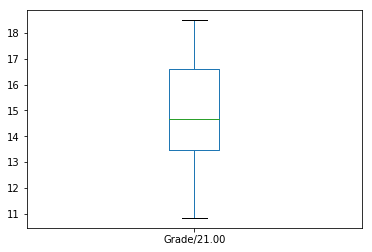

In [261]:
def Q8_function(file):
    
    """
    :type : String
    :rtype: Plot
    """
    df = Q3_function(Q1_function(), file)
    Q8_plot = df[['Grade/21.00']].plot.box(return_type='axes')
    
    return Q8_plot


# Call the function. Plot will display.
Q8_function(file='Exceptions')

### Question 9: Return the number of rows and columns present in the 'Strings' dataset

* Use the `df.shape` attribute.

In [262]:
def Q9_function(file):
    
    """
    :type : String
    :rtype: list
    """ 
    # TYPE YOUR CODE HERE
    
    df = Q3_function(Q1_function(), file)
    shape = df.shape
    return shape[0],shape[1]
    


# Call the function and print the results
rows, columns = Q9_function (file='Strings')
print("Rows:",rows)
print("Columns:",columns)

Rows: 17
Columns: 7


### Question 10: Use the output from Question 5. Group the students based on their score in 'Q. 5 /12.00' column

* Which students scored 0 
* How many students achieved the maximum possible score
* Consider NA/missing values as 0

*Hint : Use groupby function.*


In [263]:
def Q10_function(df):
    
    """
    :type : DataFrame
    :rtype: list, int
    """ 
    # TYPE YOUR CODE HERE

    grouped = df.groupby('Q.5/12.00')
    
    zero = grouped.get_group(0)
    
    max_ = len(grouped.get_group(df['Q.5/12.00'].max()))
    
    return list(zero['id']) , max_

# Call the function and print the results
zero, maximum = Q10_function(Q6_df)
print("Students scoring zero :",zero)
print("Number of students with maximum score :",maximum)

Students scoring zero : [13, 18]
Number of students with maximum score : 2


### Question 11: Find out who ('id') has scored the maximum combined score in the 'Tuples' and 'Taxonomy' quiz.

* Use the `pd.merge()` function.
* Call the function you wrote for Question 5 to convert time and remove spaces in columns (will be used in later questions).
* Create a new column 'Total_score' which is the sum of the scores of the two quizzes.

In [264]:
def Q11_function():
    
    """
    :type : None
    :rtype: Dataframe, int
    """ 
    # TYPE YOUR CODE HERE
    tuples_df = Q3_function(Q1_function(), 'Tuples')
    temp1 , tuples_df = Q5_function(tuples_df)
    tuples_df = tuples_df.loc[:,['id','Grade/20.00' ,'time']]
    
    tax_df = Q3_function(Q1_function(), 'Taxonomy')
    temp2 , tax_df = Q5_function(tax_df)
    tax_df = tax_df.loc[:,['id','Grade/21.00','time']]
    
#     print(tuples_df)
#     print(tax_df)
    
    df = pd.merge(tuples_df, tax_df, on='id', how='outer')
    df.fillna(value=0 , inplace=True)
    df = df[df['time_x'] != 0]
    df['Total_score'] = df['Grade/20.00'] + df['Grade/21.00']
    df['Total_time'] = df['time_x'] + df['time_y']
    return df, df.at[df['Total_score'].idxmax(), 'id']

# Call the function and print the results. The DataFrame will be used in subsequent questions
Q11_df,max_scorer = Q11_function()
print("Max scorer :",max_scorer)

Max scorer : 10


### Question 12: Use the DataFrame generated in Question 11 and return the list of ids whose total time for both quizzes is less than than 20 minutes.

* Sort the list before returning.
* Can you code it in one line?

In [265]:
def Q12_function(df):
    
    """
    :type : DataFrame
    :rtype: list(int)
    """ 
    # TYPE YOUR CODE HERE
#     print(df)
    return sorted(list(df.loc[((df['Total_time']/60) < 20)]['id']))
    


# Call the function and print the results.
ids = Q12_function(Q11_df)
print("ID of students :",ids)

ID of students : [3, 4, 7, 8, 12, 18]


# Question 13: Discretize the column 'Grade/45.00' for the DataFrame generated in Question 6 and create a new column. Find the number of people (id) per bin. Return a DataFrame with only the bins and count per bin.

*Hints:* 
* _Use 'cut' and 'groupby'._
* _Include the overall average in the groupings._
* _You won't need to use 'drop' to drop columns. Use groupby and check the result._
* _Use 5 bins_
* Don't consider 'Overall Average' row.

In [266]:
def Q13_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """    
    # TYPE YOUR CODE HERE
    newdf = df
    
    newdf=newdf.drop([19])
    
    list1 =  pd.cut(newdf['Grade/45.00'], 5)
    
    newdf['bins'] = pd.DataFrame(list1)
    
    grouped_object = newdf.groupby('bins')
    
    groupnames = grouped_object.groups.keys()
    
    rv = []
    
    for item in groupnames:
        rv.append(list(grouped_object.get_group(item)['id']))
    
    rv1 = pd.Series(rv)
    #rv1.replace(np.nan, 0)
    
    return rv1


# Call the function and print the results.
Q13_df = Q13_function(Q6_df)
print(Q13_df)

0           [15, 16, 17, 18]
1               [12, 13, 14]
2    [5, 6, 7, 8, 9, 10, 11]
3                     [3, 4]
4                  [0, 1, 2]
dtype: object


### INSTRUCTIONS: Complete unit testing for the remaining functions to check correctness of your code.

In [267]:
import unittest

class TestNotebook(unittest.TestCase):
    
    def test_Q01_function(self):
        names = ['Python-QUIZ Coercion (6 min.)-grades.xlsx', 
                 'Python-QUIZ Conditionals (6 min.)-grades.xlsx', 
                 'Python-QUIZ Dictionaries (10 min.)-grades.xlsx', 
                 'Python-QUIZ Exceptions (10 min.)-grades.xlsx', 
                 'Python-QUIZ Functions (18 min.)-grades.xlsx', 
                 'Python-QUIZ Iterations (6 min.)-grades.xlsx', 
                 'Python-QUIZ Lists (10 min.)-grades.xlsx', 
                 'Python-QUIZ Sets (7 min)-grades.xlsx', 
                 'Python-QUIZ Strings (5 min.)-grades.xlsx', 
                 'Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', 
                 'Python-QUIZ Tuples (10 min.)-grades.xlsx']
        result = Q1_function()
        
        fileNames = []
        
        for fileName in result:
            fileNames.append(fileName.split("/")[-1].split("\\")[-1])
        
        self.assertListEqual(fileNames,names)
        

    def test_Q02_function(self):
        
        ans='Python-QUIZ Lists (10 min.)-grades.xlsx'
        
        result=Q2_function(filenames, s = "Lists")
        
        #Handling removal of the path to check only filename
        self.assertEqual(ans,result.split("/")[-1].split("\\")[-1])

    def test_Q03_function(self):
        
        origDf = pd.read_excel('data_raw/data_raw/Python-QUIZ Coercion (6 min.)-grades.xlsx')
#         print(origDf)
        dfFromFunction = Q3_function(filenames, s = "Coercion")
#         print(dfFromFunction)
        pd.testing.assert_frame_equal(origDf , dfFromFunction)
        
        
    def test_Q04_function(self):
        
        cols_ans=['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00',  'id']
        subset_cols_ans= ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]
        top_ans=10
        
        cols_result,subset_result,top_result=Q4_function(functions_df)

        self.assertEqual(cols_ans,list(cols_result))
        self.assertEqual(subset_cols_ans,list(subset_result.columns))
        self.assertEqual(top_ans,len(top_result))
        
    def test_Q05_function(self):
        column_types, df = Q5_function(df_subset)
        
        totalTime = 25489 #CalculatedManually
        self.assertEqual(totalTime , df['time'].sum())
        
    def test_Q06_function(self):
#         columns,duplicate,corrupt('-')       
        df = Q6_function(Q5_df)
        columns = df.dtypes
        
        flag = 1
        
        for column in columns:
            if column != 'int8' and column != 'float64':
                flag = 0
        
        newDf = df.drop_duplicates()
        if not newDf.equals(df):
            flag = 0
        
        for cols in df.columns:
            if '-' in df[cols]:
                flag = 0
        
        self.assertEqual(flag , 1)

    def test_Q07_function(self):
        ans=(14.83,2.19,13.46,14.66,16.62,18.5,10.83) 
        result=Q7_function(file="Exceptions")
        self.assertEqual(ans, result)
    
    def test_Q09_function(self):
        ans = (17,7)
        corrRows = 17
        corrCols = 7
        rows, columns = Q9_function (file='Strings')
        flag = 1
        
        if corrRows != rows:
            flag = 0
        if corrCols != columns:
            flag = 0
        
        self.assertEqual(flag , 1)
        
    def test_Q10_function(self):
        zero, maximum = Q10_function(Q6_df)
        students = [13,18]
        numOfStudents = 2
        flag = 1
        
        if numOfStudents != maximum:
            flag = 0
        if set(zero) != set(students):
            flag = 0
        
        self.assertEqual(flag , 1)
    
    def test_Q11_function(self):
        ans = 10
        Q11_df,max_scorer = Q11_function()
        self.assertEqual(ans , max_scorer)
        
    def test_Q12_function(self):
        ans=[3, 4, 7, 8, 12, 18]   
        result=Q12_function(Q11_df)
        self.assertEqual(ans, result)
        
    def test_Q13_function(self):
        ans = [[15, 16, 17, 18], [12, 13, 14], [5, 6, 7, 8, 9, 10, 11], [3, 4], [0, 1, 2]]
        temp = Q13_function(Q6_df)
        result = [temp.iloc[x] for x in range(len(temp))]
        
        for x in range(len(ans)):
            self.assertEqual(sum(result[x]), sum(ans[x]))

        
unittest.main(argv=[''], verbosity=2, exit=False)

test_Q01_function (__main__.TestNotebook) ... ok
test_Q02_function (__main__.TestNotebook) ... ok
test_Q03_function (__main__.TestNotebook) ... C:\Users\Utkarsh\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\Utkarsh\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\Utkarsh\Anaconda3\lib\site-packages\xlrd\xlsx.py:312: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
ok
test_Q04_function (__main__.TestNotebook) ... ok
test_Q05_function (__main__.TestNotebook) ... ok
test_Q06_function (__